### This notebook is used to visualise the MNIST dataset with different preprocessing applied and through different methods to help optimizing the ML models

In [16]:
# import mnist and matplotlib to see the images

from tensorflow.keras.datasets.mnist import load_data as load_mnist
import matplotlib.pyplot as plt

In [17]:
# load dataset
(x_train, y_train), (x_test, y_test) = load_mnist()
print(x_train.reshape(-1, 28, 28, 1).shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(60000, 28, 28, 1)
(60000,)
(10000, 28, 28)
(10000,)


## Raw images
### n first train images

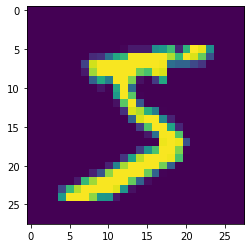

Target: 5


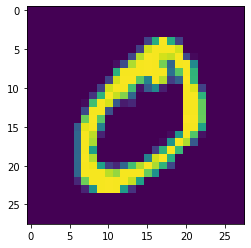

Target: 0


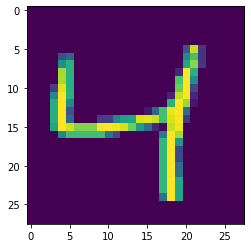

Target: 4


In [18]:
nb_img_to_show = 3

for i in range(0, nb_img_to_show):
    plt.imshow(x_train[i])
    plt.show()
    print(f'Target: {y_train[i]}')

### n first test images

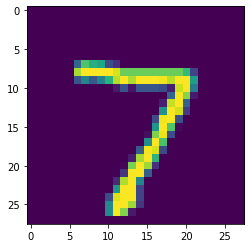

Target: 7


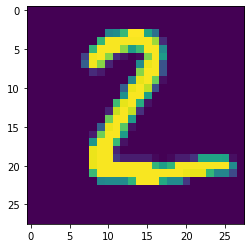

Target: 2


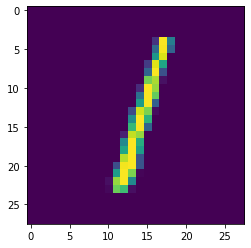

Target: 1


In [19]:
nb_img_to_show = 3

for i in range(0, nb_img_to_show):
    plt.imshow(x_test[i])
    plt.show()
    print(f'Target: {y_test[i]}')

## Noisy images

In [20]:
from skimage.util import random_noise
from PIL import Image
import numpy

### n first train images

(3, 28, 28)


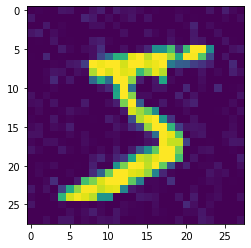

Target: 5


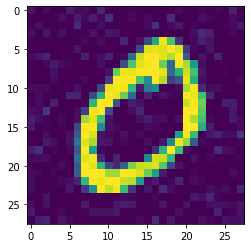

Target: 0


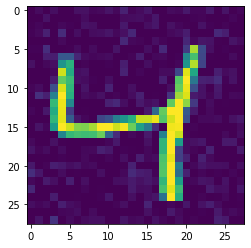

Target: 4


In [21]:
noisy_imgs = random_noise(x_train[:3], mode='gaussian', var=0.0025)
print(noisy_imgs.shape)

nb_img_to_show = 3

for i in range(0, nb_img_to_show):
    plt.imshow(noisy_imgs[i])
    plt.show()
    print(f'Target: {y_train[i]}')

### n first test images

(3, 28, 28)


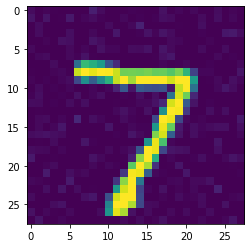

Target: 7


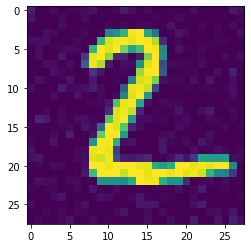

Target: 2


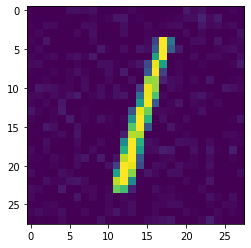

Target: 1


In [22]:
noisy_imgs = random_noise(x_test[:3], mode='gaussian', var=0.001)
print(noisy_imgs.shape)

nb_img_to_show = 3

for i in range(0, nb_img_to_show):
    plt.imshow(noisy_imgs[i])
    plt.show()
    print(f'Target: {y_test[i]}')

## Rotated images

### n first train rotated images

(3, 28, 28)


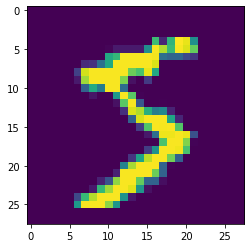

Target: 7


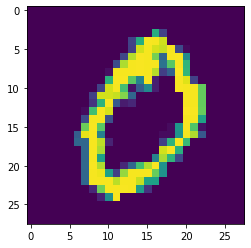

Target: 2


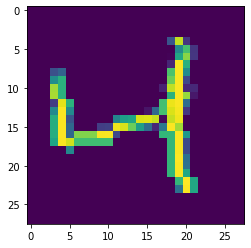

Target: 1


In [23]:
rotated_images = numpy.array([numpy.array(Image.fromarray(image).rotate(10)) for image in x_train[:3]])
print(rotated_images.shape)

nb_img_to_show = 3

for i in range(0, nb_img_to_show):
    plt.imshow(rotated_images[i])
    plt.show()
    print(f'Target: {y_test[i]}')

# Traffic signs dataset

### Imports

In [24]:
import os
import numpy as np
from skimage.io import imread
from skimage.transform import resize

### Arabic

In [25]:
def get_arabic_traffic_signs():
    """Loads and resizes the arabic traffic signs images"""
    
    x_train, y_train, x_test, y_test = [], [], [], []
    
    nb_images = 10
    
    # Get train images
    for file in os.scandir("resources/arabic_traffic_signs/training"):
        x_train.append(imread(file.path))
        y_train.append(int(file.name.split("_")[0]))
        
        if nb_images == 0:
            break
        nb_images -= 1
    
    # Get test images
    for file in os.scandir("resources/arabic_traffic_signs/testing"):
        x_test.append(imread(file.path))
        y_test.append(int(file.name.split("_")[0]))
        
        if nb_images == 0:
            break
        nb_images -= 1
    
    # Give all images same size (512, 512) 
    x_train = np.array([resize(img, (512, 512)) for img in x_train])
    x_test = np.array([resize(img, (512, 512)) for img in x_test])
                
    return (np.array(x_train), np.array(y_train)), (np.array(x_test), np.array(y_test))

(11, 512, 512, 3)


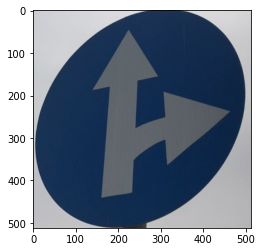

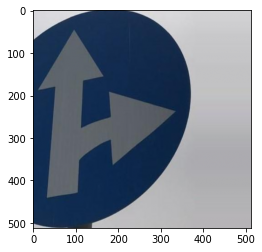

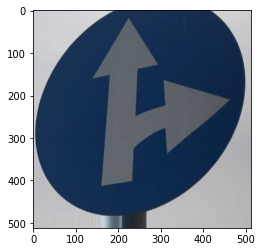

In [31]:
(x_train, y_train), (x_test, y_test) = get_arabic_traffic_signs()
print(x_train.shape)

for i in range(3):
    plt.imshow(x_train[i])
    plt.show()